# Demo: GNSS Trajectory
UW Geospatial Data Analysis  
CEE498/CEWA599  
David Shean  

## Pandas Time Series
* https://pandas.pydata.org/docs/user_guide/timeseries.html
* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
* https://pandas.pydata.org/docs/user_guide/timeseries.html#overview

## Topics to cover
* Ingesting and DateTime Index
* Resampling
* Indexing

In [97]:
import pandas as pd
import geopandas as gpd

In [98]:
fn1='Shean_OASfM_20130909_PosnPnt.csv'
fn2='Shean_OASfM_20130910_PosnPnt.csv'

In [99]:
df = pd.read_csv(fn1)

In [ ]:
df

In [ ]:
pd.to_datetime(df['GPS Date'] + ' ' + df['GPS Time'])

In [101]:
df = pd.read_csv(fn1, parse_dates=[['GPS Date', 'GPS Time']])

In [ ]:
df.columns

In [ ]:
df

In [102]:
df.drop(columns=['Latitude.1', 'Longitude.1'], inplace=True)

In [103]:
df.rename(columns={'GPS Date_GPS Time':'GPS DateTime'}, inplace=True)

In [104]:
df.set_index('GPS DateTime', inplace=True)

In [114]:
df.head()

,ID,Latitude,Longitude,HAE,Max PDOP,Max HDOP,Corr Type,GPS Height,Vert Prec,Horz Prec,Std Dev,geometry
GPS DateTime,,,,,,,,,,,,
2013-09-09 20:01:20,1,45.814143,-122.557827,57.791,2.6,1.4,Postprocessed Code,57.791,1.4,0.5,NaN,POINT (-122.55783 45.81414)
2013-09-09 20:01:21,2,45.814157,-122.557834,57.892,2.6,1.4,Postprocessed Code,57.892,1.4,0.6,NaN,POINT (-122.55783 45.81416)
2013-09-09 20:01:22,3,45.814170,-122.557829,53.464,3.3,1.8,Postprocessed Code,53.464,1.6,0.6,NaN,POINT (-122.55783 45.81417)
2013-09-09 20:01:23,4,45.814179,-122.557830,59.237,3.3,1.8,Postprocessed Code,59.237,1.7,0.5,NaN,POINT (-122.55783 45.81418)
2013-09-09 20:01:24,5,45.814199,-122.557822,55.283,10.4,2.5,Postprocessed Code,55.283,2.4,0.6,NaN,POINT (-122.55782 45.81420)


In [105]:
#Define function to do the above wrangling
def parse_trimblexh_export(fn):
    df = pd.read_csv(fn, parse_dates=[['GPS Date', 'GPS Time']])
    df.drop(columns=['Latitude.1', 'Longitude.1'], inplace=True)
    df.rename(columns={'GPS Date_GPS Time':'GPS DateTime'}, inplace=True)
    df.set_index('GPS DateTime', inplace=True)
    return df

In [106]:
df1 = parse_trimblexh_export(fn1)
df2 = parse_trimblexh_export(fn2)

In [107]:
df = pd.concat([df1, df2])

In [ ]:
df

In [108]:
import hvplot.pandas

In [ ]:
df1.columns

In [ ]:
#%matplotlib widget

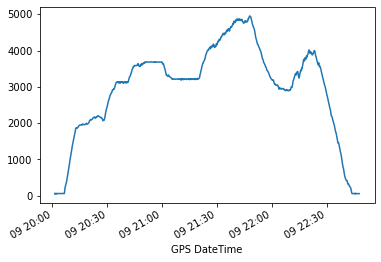

In [109]:
df1['HAE'].plot();

In [ ]:
df1.hvplot()

In [ ]:
df.hvplot()

In [ ]:
df['2013-09-10 20:26:57':'2013-09-10 20:26:59']

In [ ]:
df1['HAE'].hvplot()

In [110]:
gdf1 = gpd.GeoDataFrame(df1, crs='EPSG:4326', geometry=gpd.points_from_xy(df1['Longitude'], df1['Latitude']))

In [111]:
gdf = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

In [ ]:
gdf1

In [ ]:
gdf1.hvplot(aspect='equal')

In [112]:
gdf1_utm = gdf1.to_crs('EPSG:32610')

In [ ]:
gdf1_utm.hvplot(aspect='equal', c='HAE')

In [ ]:
#https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

In [113]:
gdf1_utm.head()

,ID,Latitude,Longitude,HAE,Max PDOP,Max HDOP,Corr Type,GPS Height,Vert Prec,Horz Prec,Std Dev,geometry
GPS DateTime,,,,,,,,,,,,
2013-09-09 20:01:20,1,45.814143,-122.557827,57.791,2.6,1.4,Postprocessed Code,57.791,1.4,0.5,NaN,POINT (534352.909 5073492.900)
2013-09-09 20:01:21,2,45.814157,-122.557834,57.892,2.6,1.4,Postprocessed Code,57.892,1.4,0.6,NaN,POINT (534352.393 5073494.477)
2013-09-09 20:01:22,3,45.814170,-122.557829,53.464,3.3,1.8,Postprocessed Code,53.464,1.6,0.6,NaN,POINT (534352.779 5073495.940)
2013-09-09 20:01:23,4,45.814179,-122.557830,59.237,3.3,1.8,Postprocessed Code,59.237,1.7,0.5,NaN,POINT (534352.700 5073496.922)
2013-09-09 20:01:24,5,45.814199,-122.557822,55.283,10.4,2.5,Postprocessed Code,55.283,2.4,0.6,NaN,POINT (534353.303 5073499.172)


## Horizontal Velocity (ground speed)
* Could also look at 3-D vector displacement, vertical velocity, etc.

In [ ]:
gdf1_utm.distance(gdf1_utm.shift(1))

In [115]:
gdf1_utm['dm'] = gdf1_utm.distance(gdf1_utm.shift(1))

<ipython-input-115-00434a9b3ef1>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32610
Right CRS: None

  gdf1_utm['dm'] = gdf1_utm.distance(gdf1_utm.shift(1))


In [ ]:
gdf1_utm['dm'].max()

In [ ]:
gdf1_utm.index

In [ ]:
gdf1_utm.index.to_series().diff()

In [116]:
gdf1_utm['dt'] = gdf1_utm.index.to_series().diff().dt.total_seconds()

In [ ]:
gdf1_utm['dt']

In [117]:
gdf1_utm['v'] = gdf1_utm['dm']/gdf1_utm['dt']

In [ ]:
gdf1_utm['v'].hvplot()

In [ ]:
gdf1_utm['a'] = gdf1_utm['v'].diff()

In [118]:
from geoviews import tile_sources as gvts
#map_tiles = gvts.StamenTerrain
map_tiles = gvts.EsriImagery

In [ ]:
map_tiles

In [119]:
#kw = {'width':600, 'height':600, 'data_aspect':1, 'alpha':1.0}
kw = {'width':400, 'height':400, 'data_aspect':1, 'alpha':1.0}
kw['colorbar'] = True
kw['cmap'] = 'inferno'
#kw['hover'] = False
#kw['datashade'] = True

### Overlay points on map tiles (subset of points)
* To combine layers in a single plot using `holoviews`, you use the asterisk (*) to overlay the two objects
    * You can use the plus sign (+) to build a layout with two separate subplots 
* Currently need to use the `geo=True` option and revert back to the `glas_gdf` GeoDataFrame with lat/lon geometry, not our reprojected points in `glas_gdf_aea`.  
    * In principle, hvplot/geoviews should work with our projected points, but there are some residual issues, and it appears that some underlying code somewhere in the stack is assuming lat/lon

In [120]:
map_tiles * gdf1_utm[::3].to_crs('EPSG:3857').hvplot(c='HAE', size=1, **kw)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [x,y]   (HAE)

In [ ]:
gdf1_utm[::3].shape

## Using datashader to efficiently render all points

In [121]:
map_tiles * gdf1_utm.to_crs('EPSG:3857').hvplot(c='HAE', size=1, datashade=True, **kw)

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [x,y]   (R,G,B,A)

## Other useful analysis
* Distance from starting point
* Time spent in different elevation bins
* Altitude above ground - sample DEM
* Geotagging photos baed on timestamp